In [1]:
import numpy as np 
import pandas as pd 
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [148]:
def draw_example(d):
    x = np.random.uniform(-1, 1, d)
    u = np.sqrt(2 / d) * np.ones(d)  
    probability = 1 / (1 + np.exp(-np.dot(u,x))) 
    y = np.random.binomial(1, probability)
    y = 2 * y - 1 
    return x, y


In [153]:
def grad(w, x, y):
    z = -y * np.dot(w, x)
    gradient = -y * x / (1 + np.exp(z))
    return gradient

def projection(w, norm):
    norm_w = np.linalg.norm(w)
    if norm_w > norm:
        w = (w / norm_w) * norm
    return w

def OGD(eta, training_examples, norm=20):
    d = training_examples[0][0].shape[0] 
    w = np.zeros(d)  
    sum_w = np.zeros(d)  
    
    for t, (x_t, y_t) in enumerate(training_examples, start=1):
        g = grad(w, x_t, y_t)
        w -= eta * g
        w = projection(w, norm)
        sum_w += w
    avg_w = sum_w / len(training_examples)
    
    return avg_w

eta = 0.1 
train = [draw_example(d) for _ in range(100)] 
average_w = OGD(eta, train)

<>:32: SyntaxWarning: invalid escape sequence '\h'
<>:32: SyntaxWarning: invalid escape sequence '\h'
C:\Users\blade\AppData\Local\Temp\ipykernel_10848\1504530021.py:32: SyntaxWarning: invalid escape sequence '\h'
  plt.errorbar(C, mean_losses, yerr=std_losses, fmt='-o', label='Empirical $L_D(\hat{w})$')


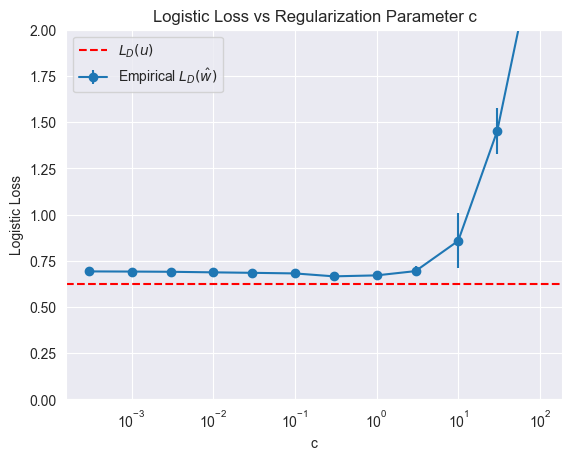

In [152]:

def logloss(w, x, y):
    z = -y * np.dot(w, x)
    loss = np.log(1 + np.exp(z))
    return loss

def evaluate_loss(w, test_examples):
    losses = [logloss(w, x_t, y_t) for x_t, y_t in test_examples]
    return np.mean(losses)

d = 10
C = [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
mean_losses = []
std_losses = []
u_loss = []

for c in C:
    losses = []
    for _ in range(5):
        train = [draw_example(d) for _ in range(100)]
        test = [draw_example(d) for _ in range(500)]
        eta = np.sqrt(c / len(train))
        average_w = OGD(eta, train) 
        loss = evaluate_loss(average_w, test)
        losses.append(loss)
        
        u = np.sqrt(2 / d) * np.ones(d)
        u_loss.append(evaluate_loss(u, test))
    
    mean_losses.append(np.mean(losses))
    std_losses.append(np.std(losses))

plt.errorbar(C, mean_losses, yerr=std_losses, fmt='-o', label='Empirical $L_D(\hat{w})$')
plt.axhline(np.mean(u_loss), color='r', linestyle='--', label='$L_D(u)$')
plt.xscale('log')
plt.ylim([0, 2])
plt.xlabel('c')
plt.ylabel('Logistic Loss')
plt.title('Logistic Loss vs Regularization Parameter c')
plt.legend()
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
C:\Users\blade\AppData\Local\Temp\ipykernel_10848\752731890.py:26: SyntaxWarning: invalid escape sequence '\h'
  plt.errorbar(C, ML, yerr=STD, fmt='-o', label=f'Empirical $L_D(\hat{{w}})$, d={d}')


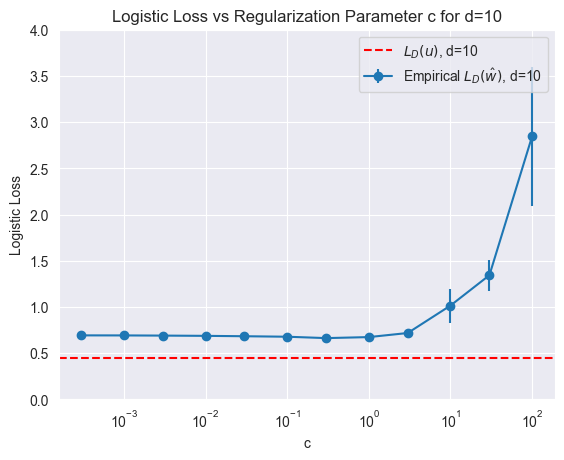

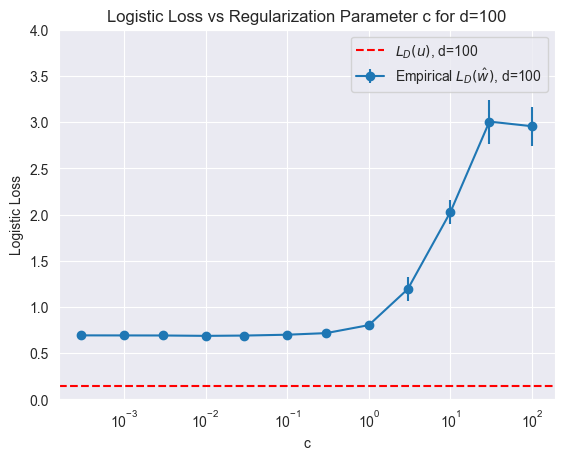

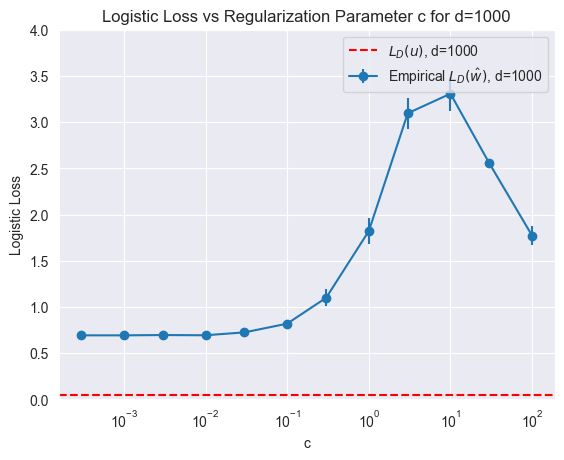

In [146]:
import numpy as np
import matplotlib.pyplot as plt
def run(d, C):
    ML = []
    STD = []
    u_loss = []

    for c in C:
        losses = []
        for _ in range(5):
            training_examples = [draw_example(d) for _ in range(100)]
            test_examples = [draw_example(d) for _ in range(500)]
            
            eta = np.sqrt(c / len(training_examples))
            average_w = OGD(eta, training_examples)
            
            loss = evaluate_loss(average_w, test_examples)
            losses.append(loss)
            
            u = np.sqrt(2 / d) * np.ones(d)
            u_loss.append(evaluate_loss(u, test_examples))
        
        ML.append(np.mean(losses))
        STD.append(np.std(losses))

    plt.errorbar(C, ML, yerr=STD, fmt='-o', label=f' $L_D(\hat{{w}})$, d={d}')
    plt.axhline(np.mean(u), color='r', linestyle='--', label=f'$L_D(u)$, d={d}')
    plt.xscale('log')
    plt.ylim([0, 4])
    plt.xlabel('c')
    plt.ylabel('logloss')
    plt.title(f'logloss vs c for d={d}')
    plt.legend()
    plt.show()

C = [0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

for d in [10, 100, 1000]:
    run(d, C)